https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.61 ms (started: 2021-09-07 02:33:51 +00:00)


1
         Unnamed: 0  Source Port  Destination Port  ...  Idle Max  Idle Min  Inbound
0            117228          784             23687  ...       0.0       0.0        1
1             37013        53483                53  ...       0.0       0.0        0
2            344738        65390              9107  ...       0.0       0.0        1
3            107659        55795              7564  ...       0.0       0.0        1
4             40253          883             38502  ...       0.0       0.0        1
...             ...          ...               ...  ...       ...       ...      ...
1047834       55643         1021              4382  ...       0.0       0.0        1
1047835       46097          527             17722  ...       0.0       0.0        1
1047836      277500          738             22877  ...       0.0       0.0        1
1047837       27109        61445             32407  ...       0.0       0.0        1
1047838       11344        43282              7278  ...       0

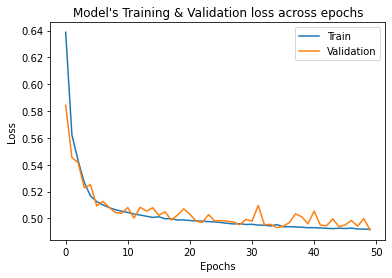

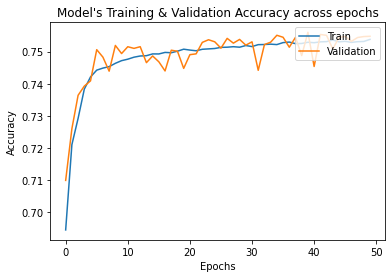

2
         Unnamed: 0  Source Port  Destination Port  ...  Idle Max  Idle Min  Inbound
0            146486          699             21285  ...       0.0       0.0        1
1             64183        53481             54021  ...       0.0       0.0        1
2             57198        64340              3924  ...       0.0       0.0        1
3            123576        54883             59536  ...       0.0       0.0        1
4             92062        47261             13194  ...       0.0       0.0        1
...             ...          ...               ...  ...       ...       ...      ...
1047834       55643         1021              4382  ...       0.0       0.0        1
1047835       46097          527             17722  ...       0.0       0.0        1
1047836      277500          738             22877  ...       0.0       0.0        1
1047837       27109        61445             32407  ...       0.0       0.0        1
1047838       11344        43282              7278  ...       0

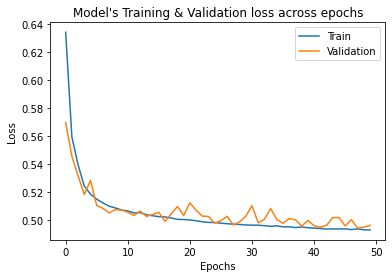

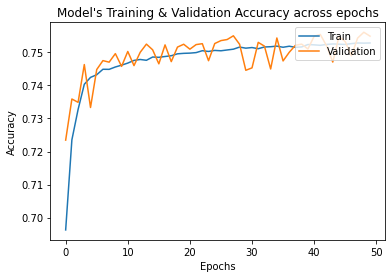

3
         Unnamed: 0  Source Port  Destination Port  ...  Idle Max  Idle Min  Inbound
0            146486          699             21285  ...       0.0       0.0        1
1             64183        53481             54021  ...       0.0       0.0        1
2             57198        64340              3924  ...       0.0       0.0        1
3            123576        54883             59536  ...       0.0       0.0        1
4             92062        47261             13194  ...       0.0       0.0        1
...             ...          ...               ...  ...       ...       ...      ...
1047834       55643         1021              4382  ...       0.0       0.0        1
1047835       46097          527             17722  ...       0.0       0.0        1
1047836      277500          738             22877  ...       0.0       0.0        1
1047837       27109        61445             32407  ...       0.0       0.0        1
1047838       11344        43282              7278  ...       0

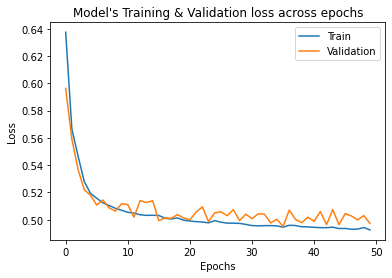

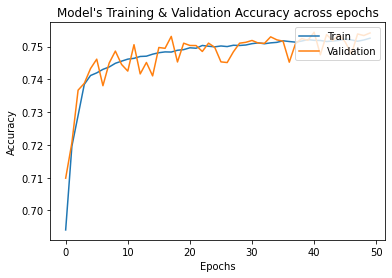

4
         Unnamed: 0  Source Port  Destination Port  ...  Idle Max  Idle Min  Inbound
0            146486          699             21285  ...       0.0       0.0        1
1             64183        53481             54021  ...       0.0       0.0        1
2             57198        64340              3924  ...       0.0       0.0        1
3            123576        54883             59536  ...       0.0       0.0        1
4             92062        47261             13194  ...       0.0       0.0        1
...             ...          ...               ...  ...       ...       ...      ...
1047834       55643         1021              4382  ...       0.0       0.0        1
1047835       46097          527             17722  ...       0.0       0.0        1
1047836      277500          738             22877  ...       0.0       0.0        1
1047837       27109        61445             32407  ...       0.0       0.0        1
1047838       11344        43282              7278  ...       0

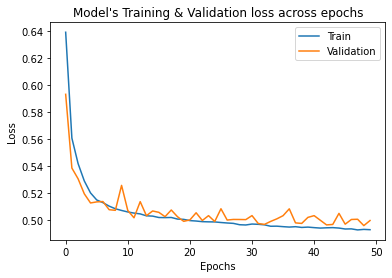

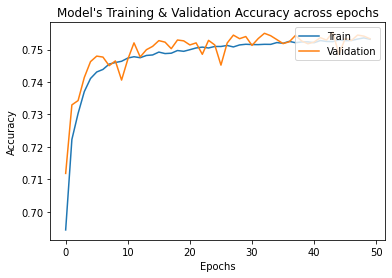

5
         Unnamed: 0  Source Port  Destination Port  ...  Idle Max  Idle Min  Inbound
0            146486          699             21285  ...       0.0       0.0        1
1             64183        53481             54021  ...       0.0       0.0        1
2             57198        64340              3924  ...       0.0       0.0        1
3            123576        54883             59536  ...       0.0       0.0        1
4             92062        47261             13194  ...       0.0       0.0        1
...             ...          ...               ...  ...       ...       ...      ...
1047835        8406          513             35344  ...       0.0       0.0        1
1047836       44233          844             42095  ...       0.0       0.0        1
1047837      143592          619             40337  ...       0.0       0.0        1
1047838         643        57244               443  ...       0.0       0.0        0
1047839        7409         1011             31519  ...       0

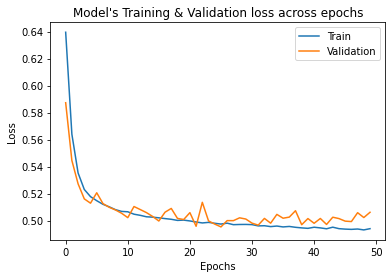

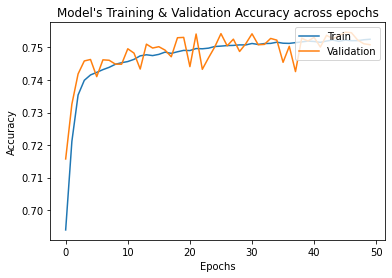


Accuracy Score average: 0.6421558432109002
Precision Score average: 0.6751567852805418
Recall Score average: 0.6440991387241051
F1 Score average: 0.6125984209197634
Roc_Auc_Score average: 0.9604163707100908
time: 1h 39min 22s (started: 2021-09-07 02:33:51 +00:00)


In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

# import preprocessing
from sklearn import preprocessing
# import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
# define columns subset
cols_subset_features = ['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',	 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Inbound']
cols_subset_label = ['Label']

kNumber = 5
index = 1
list_acc = []
list_ps = []
list_rs = []
list_fs = []
list_roc = []
predicted_targets = np.array([])
actual_targets = np.array([])

while index <= kNumber:
  print(index)
  X_train_filepath = "/content/drive/MyDrive/ColabFiles/KFold_5/X_train83_" + str(index) + ".csv"
  X_test_filepath = "/content/drive/MyDrive/ColabFiles/KFold_5/X_test83_" + str(index) + ".csv"
  y_train_filepath = "/content/drive/MyDrive/ColabFiles/KFold_5/y_train83_" + str(index) + ".csv"
  y_test_filepath = "/content/drive/MyDrive/ColabFiles/KFold_5/y_test83_" + str(index) + ".csv"

  X_train = pd.read_csv(X_train_filepath, low_memory=False, names=cols_subset_features, skiprows=1)
  X_test = pd.read_csv(X_test_filepath, low_memory=False, names=cols_subset_features, skiprows=1)
  y_train = pd.read_csv(y_train_filepath, low_memory=False, names=cols_subset_label, skiprows=1)
  y_test = pd.read_csv(y_test_filepath, low_memory=False, names=cols_subset_label, skiprows=1)

  print(X_train)
  print(X_train.describe())

  scaler = preprocessing.MinMaxScaler()
  normalized_X_train = scaler.fit_transform(X_train)
  normalized_X_test = scaler.fit_transform(X_test)

  ohe = preprocessing.OneHotEncoder()
  y_train = ohe.fit_transform(y_train).toarray()
  y_test = ohe.fit_transform(y_test).toarray()

  from sklearn.model_selection import train_test_split

  #split the train dataset further into train and validation with 90:10
  normalized_X_train, x_val, y_train, y_val = train_test_split(normalized_X_train,y_train, test_size=0.1, random_state=2018)
  #Check the shape of each new dataset created
  print("Shape of x_train:",normalized_X_train.shape)
  print("Shape of x_test:",normalized_X_test.shape)
  print("Shape of x_val:",x_val.shape)
  print("Shape of y_train:",y_train.shape)
  print("Shape of y_test:",y_test.shape)
  print("Shape of y_val:",y_val.shape)

  # Neural network
  model = Sequential()
  model.add(Dense(128, input_dim=82, activation='relu'))#1st layer
  model.add(Dense(128, activation='relu'))#2nd layer
  #model.add(Dense(128, activation='relu')) #3rd layer
  #model.add(Dense(32, activation='relu')) 4th layer
  #model.add(Dense(16, activation='relu')) 5th layer
  model.add(Dense(14, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #Categorical_crossentropy specifies that we have multiple classes

  history = model.fit(normalized_X_train, y_train, validation_data = (x_val,y_val),epochs=50, batch_size=64)

  y_pred = np.argmax(model.predict(normalized_X_test), axis=-1)
  print('y_pred')
  print(y_pred)
  y_pred_proba = model.predict(normalized_X_test)
  print('y_pred_proba')
  print(y_pred_proba)
  #Converting predictions to label
  pred = list()
  for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
  #Converting one hot encoded test label to label
  test = list()
  for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
  y_test_array = np.array(test)
  # Predict data
  #y_pred = classifier.predict(normalized_X_test)

  acc = accuracy_score(y_test_array, y_pred)
  print('Accuracy Score: ', acc)
  list_acc.append(acc)

  ps = precision_score(y_test_array, y_pred, average='macro',zero_division=1)
  print('Precision Score: ', ps)
  list_ps.append(ps)

  rs = recall_score(y_test_array, y_pred, average='macro')
  print('Recall Score: ', rs)
  list_rs.append(rs)

  fs = f1_score(y_test_array, y_pred, average='macro')
  print('F1 Score: ', fs)
  list_fs.append(fs)

  roc = roc_auc_score(y_test_array,y_pred_proba,multi_class="ovr")
  print('Roc_Auc_Score" ',roc)
  list_roc.append(roc)

  predicted_targets = np.append(predicted_targets, y_pred)
  actual_targets = np.append(actual_targets, y_test_array)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model's Training & Validation loss across epochs")
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model's Training & Validation Accuracy across epochs")
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()


  index = index + 1

def Average(lst):
    return sum(lst) / len(lst)

print("\nAccuracy Score average: %s" % (Average(list_acc)))
print("Precision Score average: %s" % (Average(list_ps)))
print("Recall Score average: %s" % (Average(list_rs)))
print("F1 Score average: %s" % (Average(list_fs)))
print("Roc_Auc_Score average: %s" % (Average(list_roc)))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


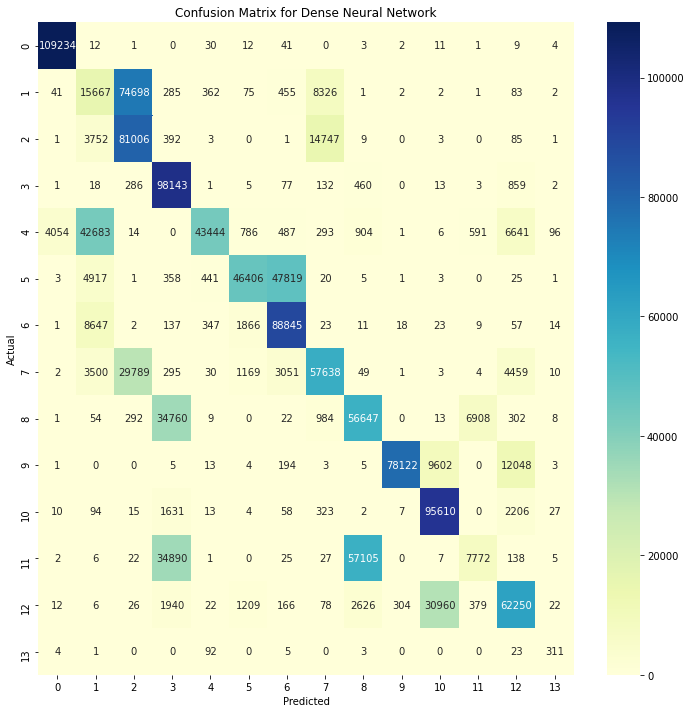

FPR: 
Predicted
0     1.031445
1    -3.085307
2     1.220471
3     1.025496
4    -0.024714
5    -0.105852
6     1.270450
7    -1.433758
8     3.431464
9    -0.015597
10    1.121083
11   -0.093630
12   -2.490522
13    2.910448
dtype: float64
TPR: 
Actual
0     0.998848
1     0.156670
2     0.810060
3     0.981430
4     0.434440
5     0.464060
6     0.888450
7     0.576380
8     0.566470
9     0.781220
10    0.956100
11    0.077720
12    0.622500
13    0.708428
dtype: float64
time: 7.98 s (started: 2021-09-07 04:35:47 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
y_classes = numpy.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
print(y_classes)


def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    #cm_sum = np.sum(cm, axis=1, keepdims=True)
    #cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
          # p = cm_perc[i, j]
            #if i == j:
               # s = cm_sum[i]
               # annot[i, j] = '%d' % (c)
           # elif c == 0:
               # annot[i, j] = ''
            #else:
            annot[i, j] = '%d' % (c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title('Confusion Matrix for Dense Neural Network')
    sns.heatmap(cm, annot=annot, cmap='YlGnBu', fmt='', ax=ax)
    filename = '/content/drive/MyDrive/ColabFiles/KFold_5/CM83_DNN_128X2.png'
    plt.savefig(filename)
    plt.show()

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('FPR: ')
    print(FPR)
    print('TPR: ')
    print(TPR)

cm_analysis(actual_targets, predicted_targets, y_classes, ymap=None, figsize=(12,12))